In [4]:
fruits = ["mango", "starfruit", "durian", "avocado", "blueberry", "cherry"]
long_fruits = (fruit.capitalize() for fruit in fruits if len(fruit) > 6)
print(list(long_fruits))

['Starfruit', 'Avocado', 'Blueberry']


In [18]:
import threading

def print_numbers():
    for i in range(1, 11):
        print(i)

thread = threading.Thread(target=print_numbers)
thread.start()


1
2
3
4
5
6
7
8
9
10


In [17]:
def calculateSq(n):
    return n*n
numbers = (2, 3, 4, 5)
result = map(calculateSq, numbers)
print(result)

In [15]:
def decorator_lowercase(function):   # defining python decorator
    def wrapper():
        func = function()
        input_lowercase = func.lower()
        return input_lowercase
    return wrapper
@decorator_lowercase    ##calling decoractor
def intro():                        #Normal function
    return 'Hello,I AM SAM'
intro()

'hello,i am sam'

In [14]:
def calculateSq(n):
    return n*n
numbers = (2, 3, 4, 5)
result = map( calculateSq, numbers)
print(result)

In [5]:
fruits = ["mango", "starfruit", "durian", "avocado", "blueberry", "cherry"]
long_fruits = [fruit.capitalize() for fruit in fruits if len(fruit) > 6]
print(long_fruits)

['Starfruit', 'Avocado', 'Blueberry']


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
arr = np.array([0, 5, 4, 0, 4, 4, 3, 0, 0, 5, 2, 1, 1, 9])
np.bincount(arr)

array([4, 2, 1, 1, 3, 2, 0, 0, 0, 1], dtype=int64)

In [4]:
# Cleaning the dataset
ath = pd.read_csv('athlete_events.csv')
ath = ath.drop(columns=["ID", "Games"])
ath = ath[ath['Medal'].notna()]
ath.reset_index(inplace=True)
ath = ath.drop(columns=["index"])
ath = ath.convert_dtypes()
ath.columns = ath.columns.str.lower()
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  string 
 1   sex     39783 non-null  string 
 2   age     39051 non-null  Int64  
 3   height  31072 non-null  Int64  
 4   weight  30456 non-null  Float64
 5   team    39783 non-null  string 
 6   noc     39783 non-null  string 
 7   year    39783 non-null  Int64  
 8   season  39783 non-null  string 
 9   city    39783 non-null  string 
 10  sport   39783 non-null  string 
 11  event   39783 non-null  string 
 12  medal   39783 non-null  string 
dtypes: Float64(1), Int64(3), string(9)
memory usage: 4.1 MB


MD Rahman

In [142]:
df = ath.copy()
ath.replace({np.nan: None}, inplace = True)
ath.head(10)

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal
0,Edgar Lindenau Aabye,M,34,None,None,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30,None,None,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30,None,None,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
5,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
6,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
7,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
8,Paavo Johannes Aaltonen,M,32,175,64,Finland,FIN,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
9,Kjetil Andr Aamodt,M,20,176,85,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


History of Medals Won by Top by Countries in Line Chart

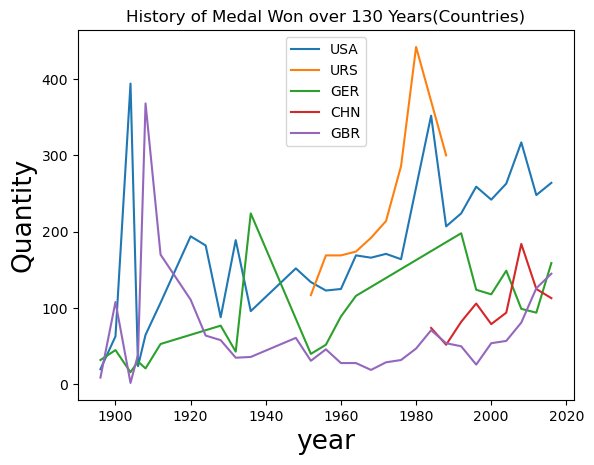

In [139]:
df = ath.copy()
lists = ["USA", "URS", "GER", "CHN", "GBR"]
for list in lists: 
        medal = df.groupby(["year", "noc", "season"])["medal"].count().reset_index()
        medal = medal[medal["season"].str.contains("Summer") == True]
        medal =  medal[medal["noc"].str.contains(f"{list}")]
       
        plt.plot(medal["year"], medal["medal"], label =f"{list}")

plt.title("History of Medal Won over 130 Years(Countries)")
plt.legend()
plt.xlabel("year", fontsize=19)
plt.ylabel("Quantity", fontsize=19)
plt.show()
      

Created a function based on Sports and the percetage medals won by Top 10 countries.

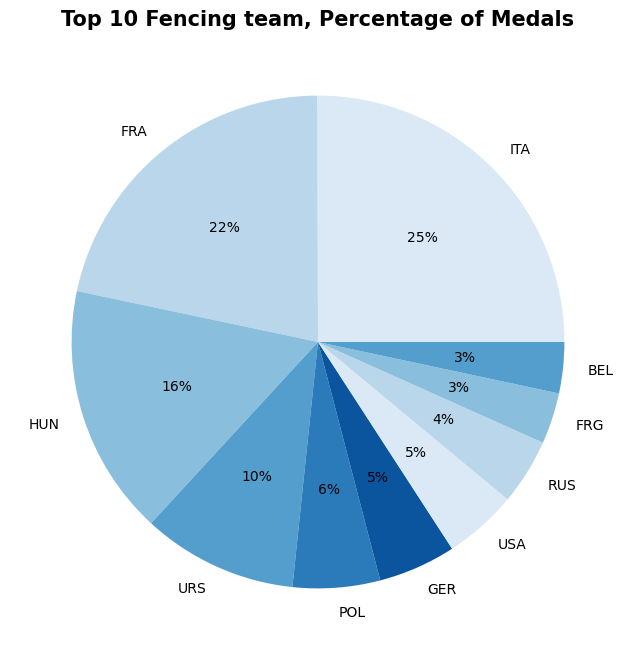

In [147]:
def plot_pie_sport(sport, palette_color ="Blues"):
#     sport= "Swimming"
    sport_name = df[df["sport"]== sport]["noc"].value_counts()[:10]
    plt.figure(figsize=(10,8))
    palette_color = sns.color_palette(palette_color)
    _, _, autotexts =  plt.pie(sport_name.values, labels = sport_name.index, colors= palette_color,  autopct='%.0f%%')
    # _, _, autotexts = pie(fbfrac,labels = fblabel,autopct='%1.1f%%',pctdistance=0.8,startangle=90,colors=fbcolor)
    # for autotext in autotexts:
    #     autotext.set_color('white')
    
    plt.title(f"Top 10 {sport} team, Percentage of Medals", weight = "bold", fontsize = 15)
    plt.show()
plot_pie_sport("Fencing")
#plot_pie_sport("Rowing")
#plot_pie_sport("Swimming")

Top 10 Countries with Most Olympics Medal

Text(34.59869047619047, 0.5, 'Medals')

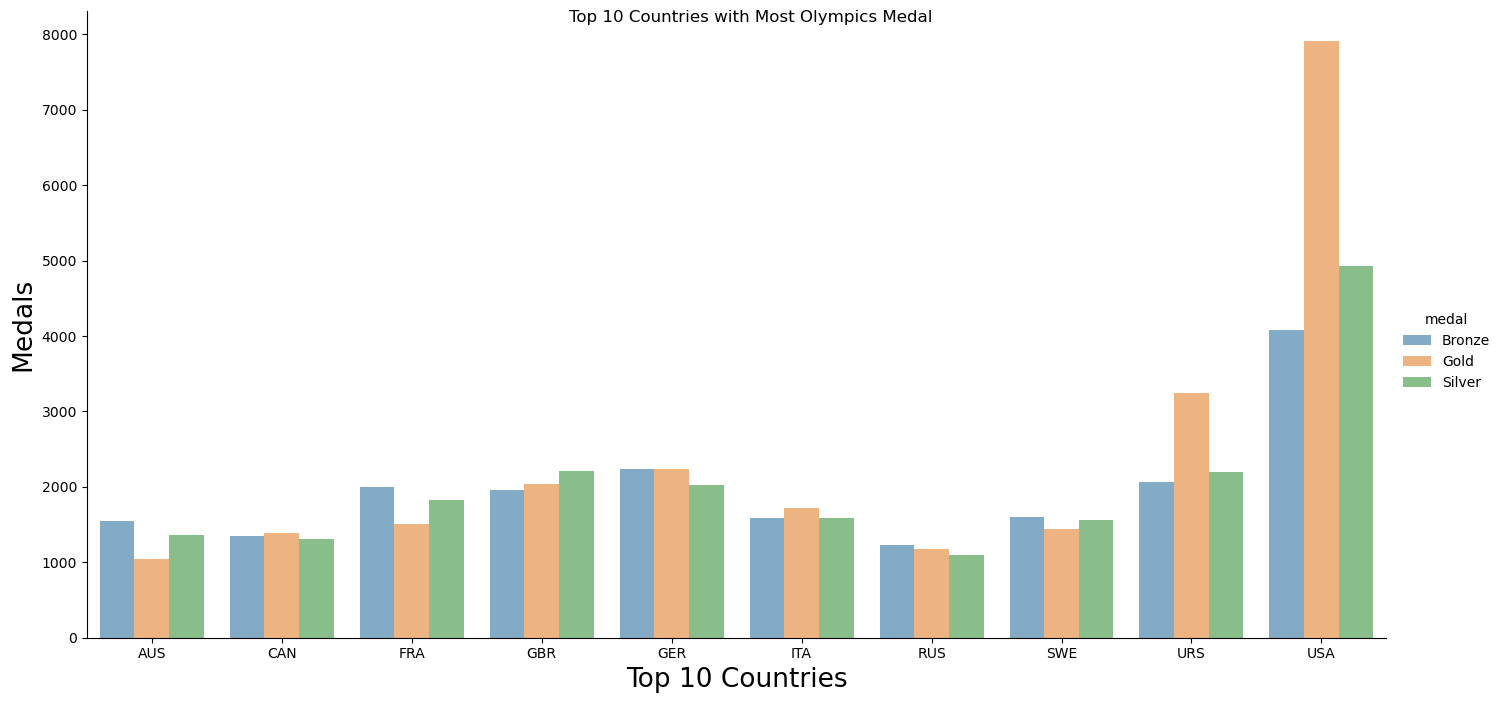

In [136]:
top10_countries_wins_most_medal = df["noc"].value_counts().iloc[:10].index
top10_countries_wins_most_medal
df1 = df.groupby(["noc", "medal"]).count().reset_index()
top10_countries_dfs = []
for country in df1["noc"].values:
    if country in top10_countries_wins_most_medal:
        top10_countries_dfs.append(df[df["noc"] == country ])
top10_countries_dfs = pd.concat(top10_countries_dfs, axis = 0)
grp_top10 = top10_countries_dfs.groupby(["noc", "medal"])["team"].count().reset_index()

ax = sns.catplot(
    data=grp_top10, x="noc", y="team", hue="medal",
    kind="bar",alpha=.6, height=7, aspect=2
    
)
plt.suptitle('Top 10 Countries with Most Olympics Medal')
plt.xlabel("Top 10 Countries", fontsize=19)
plt.ylabel("Medals", fontsize=19)


Exporting the file


In [140]:
df.to_excel("olympics.xlsx")